In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/kidneyData.csv
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3178).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3561).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (900).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1148).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (268).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-S

In [1]:
import os
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import os
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/kidneyData.csv')
df

Unnamed: 0       image_id  \
0               0  Tumor- (1044)   
1               1    Tumor- (83)   
2               2   Tumor- (580)   
3               3  Tumor- (1701)   
4               4  Tumor- (1220)   
...           ...            ...   
12441       12441   Cyst- (2522)   
12442       12442   Cyst- (2627)   
12443       12443    Cyst- (972)   
12444       12444   Cyst- (2323)   
12445       12445   Cyst- (2145)   

                                                    path   diag  target  Class  
0      /content/data/CT KIDNEY DATASET Normal, CYST, ...  Tumor       3  Tumor  
1      /content/data/CT KIDNEY DATASET Normal, CYST, ...  Tumor       3  Tumor  
2      /content/data/CT KIDNEY DATASET Normal, CYST, ...  Tumor       3  Tumor  
3      /content/data/CT KIDNEY DATASET Normal, CYST, ...  Tumor       3  Tumor  
4      /content/data/CT KIDNEY DATASET Normal, CYST, ...  Tumor       3  Tumor  
...                                                  ...    ...     ...    ...  
12441  /content/data/CT KIDNEY DATASET Normal, CYST, ...   Cyst       0   Cyst  
12442  /content/data/CT KIDNEY DATASET Normal, CYST, ...   Cyst       0   Cyst  
12443  /content/data/CT KIDNEY DATASET Normal, CYST, ...   Cyst       0   Cyst  
12444  /content/data/CT KIDNEY DATASET Normal, CYST, ...   Cyst       0   Cyst  
12445  /content/data/CT KIDNEY DATASET Normal, CYST, ...   Cyst       0   Cyst  

[12446 rows x 6 columns]

In [3]:
tumor_path = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor-'
cyst_path = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst-'
stone_path = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone-'
normal_path = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal-'

In [4]:
def load_images_labels(image_size):
    images, labels = [], []
    for i in range(len(df)):
        if df['path'].iloc[i].split('/')[-2] == 'TUMOR':
            #tumour
            full_path = tumor_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size, color_mode='grayscale')
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'CYST':
            #tumour
            full_path = cyst_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size, color_mode='grayscale')
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'STONE':
            #tumour
            full_path = stone_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size,  color_mode='grayscale')
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'NORMAL':
            #tumour
            full_path = normal_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size,  color_mode='grayscale')
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [5]:
image_size = (200,200)
images, labels = load_images_labels(image_size)

In [8]:
# Prepare the data for clustering and logistic regression
X = images.reshape(len(images), -1)
y = labels

# Cluster the data into 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
labels_pred = kmeans.fit_predict(X)

# Print the number of images in each cluster
unique_labels, counts = np.unique(labels_pred, return_counts=True)
for i in range(len(unique_labels)):
    print(f"Cluster {unique_labels[i]}: {counts[i]} images")

Cluster 0: 4240 images
Cluster 1: 8206 images


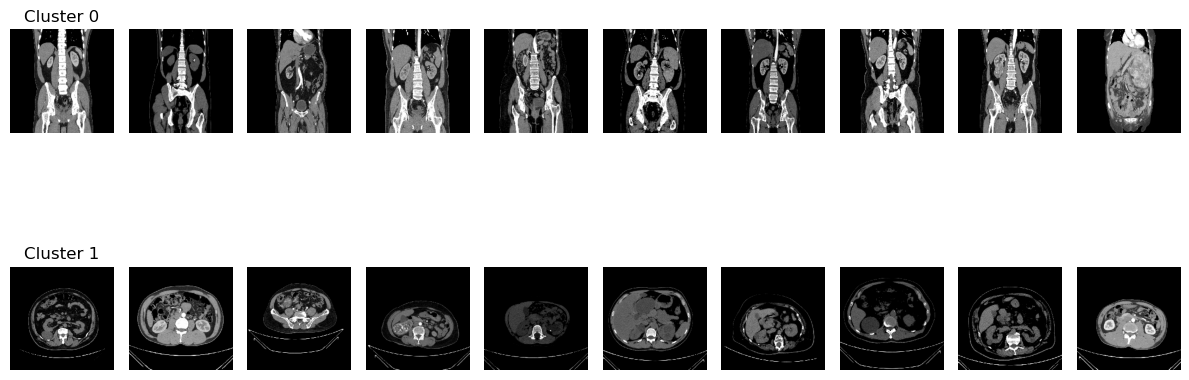

In [9]:
# Print 10 image samples for each cluster
num_samples = 10
fig, axs = plt.subplots(2, num_samples, figsize=(12, 6))
for i in range(2):
    cluster_indices = np.where(labels_pred == i)[0]
    sample_indices = np.random.choice(cluster_indices, num_samples, replace=False)
    for j, idx in enumerate(sample_indices):
        axs[i, j].imshow(images[idx])
        axs[i, j].axis("off")
        if j == 0:
            axs[i, j].set_title(f"Cluster {i}")
plt.tight_layout()
plt.show()

In [9]:
# labels_pred_df = pd.read_csv('/kaggle/input/labels-pred/labels_pred.csv', header=None)
# labels_pred = labels_pred_df[labels_pred_df.columns[0]].values

**Logistic Regression**

In [10]:
X = np.reshape(images, (len(images), -1))
y = labels

In [11]:
# Prepare the data for logistic regression for cluster 0
X_cluster0 = X[labels_pred == 0]
y_cluster0 = y[labels_pred == 0]

# Split the data into training and validation sets for cluster 0
X_val_cluster0, X_test_cluster0, y_val_cluster0, y_test_cluster0 = train_test_split(X_cluster0, y_cluster0, test_size=0.1, random_state=42)
X_train_cluster0, X_val_cluster0, y_train_cluster0, y_val_cluster0 = train_test_split(X_val_cluster0, y_val_cluster0, test_size=0.1, random_state=42)

# Train the logistic regression model for cluster 0
lr_cluster0 = LogisticRegression(multi_class='ovr', max_iter=500, solver='lbfgs')
lr_cluster0.fit(X_train_cluster0, y_train_cluster0)

# Evaluate the model on the validation set for cluster 0
y_val_pred_cluster0 = lr_cluster0.predict(X_val_cluster0)
y_test_pred_cluster0 = lr_cluster0.predict(X_test_cluster0)
val_accuracy_cluster0 = accuracy_score(y_val_cluster0, y_val_pred_cluster0)
test_accuracy_cluster0 = accuracy_score(y_test_cluster0, y_test_pred_cluster0)
print(f"Cluster 0 validation accuracy: {val_accuracy_cluster0:.4f}")
print(f"Cluster 0 test accuracy: {test_accuracy_cluster0:.4f}")

# Print the confusion matrix for the validation set for cluster 0
val_cm_cluster0 = confusion_matrix(y_val_cluster0, y_val_pred_cluster0)
print("Cluster 0 validation confusion matrix:")
print(val_cm_cluster0)

# Print the confusion matrix for the test set for cluster 0
test_cm_cluster0 = confusion_matrix(y_test_cluster0, y_test_pred_cluster0)
print("Cluster 0 test confusion matrix:")
print(test_cm_cluster0)

Cluster 0 validation accuracy: 1.0000
Cluster 0 test accuracy: 1.0000
Cluster 0 validation confusion matrix:
[[ 93   0   0   0]
 [  0 165   0   0]
 [  0   0  46   0]
 [  0   0   0  78]]
Cluster 0 test confusion matrix:
[[ 90   0   0   0]
 [  0 182   0   0]
 [  0   0  49   0]
 [  0   0   0 103]]


In [12]:
# Prepare the data for logistic regression for cluster 1
X_cluster1 = X[labels_pred == 1]
y_cluster1 = y[labels_pred == 1]

# Split the data into training and validation sets for cluster 1
X_val_cluster1, X_test_cluster1, y_val_cluster1, y_test_cluster1 = train_test_split(X_cluster1, y_cluster1, test_size=0.1, random_state=42)
X_train_cluster1, X_val_cluster1, y_train_cluster1, y_val_cluster1 = train_test_split(X_val_cluster1, y_val_cluster1, test_size=0.1, random_state=42)

# Train the logistic regression model for cluster 1
lr_cluster1 = LogisticRegression(multi_class='ovr', max_iter=500, solver='lbfgs')
lr_cluster1.fit(X_train_cluster1, y_train_cluster1)

# Evaluate the model on the validation set for cluster 1
y_val_pred_cluster1 = lr_cluster1.predict(X_val_cluster1)
y_test_pred_cluster1 = lr_cluster1.predict(X_test_cluster1)
val_accuracy_cluster1 = accuracy_score(y_val_cluster1, y_val_pred_cluster1)
test_accuracy_cluster1 = accuracy_score(y_test_cluster1, y_test_pred_cluster1)
print(f"Cluster 1 validation accuracy: {val_accuracy_cluster1:.4f}")
print(f"Cluster 1 test accuracy: {test_accuracy_cluster1:.4f}")

# Print the confusion matrix for the validation set for cluster 1
val_cm_cluster1 = confusion_matrix(y_val_cluster1, y_val_pred_cluster1)
print("Cluster 1 validation confusion matrix:")
print(val_cm_cluster1)

# Print the confusion matrix for the test set for cluster 1
test_cm_cluster1 = confusion_matrix(y_test_cluster1, y_test_pred_cluster1)
print("Cluster 1 test confusion matrix:")
print(test_cm_cluster1)

Cluster 1 validation accuracy: 1.0000
Cluster 1 test accuracy: 1.0000
Cluster 1 validation confusion matrix:
[[250   0   0   0]
 [  0 280   0   0]
 [  0   0  73   0]
 [  0   0   0 136]]
Cluster 1 test confusion matrix:
[[269   0   0   0]
 [  0 335   0   0]
 [  0   0  78   0]
 [  0   0   0 139]]


**Logistic Regression Cluster 0 Coeff**

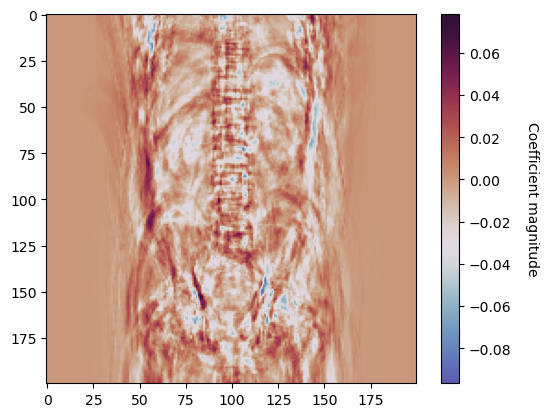

In [13]:
### CLASS 0 IS THE CYST

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('twilight_shifted')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster0.coef_[0]

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef.reshape(200, 200)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


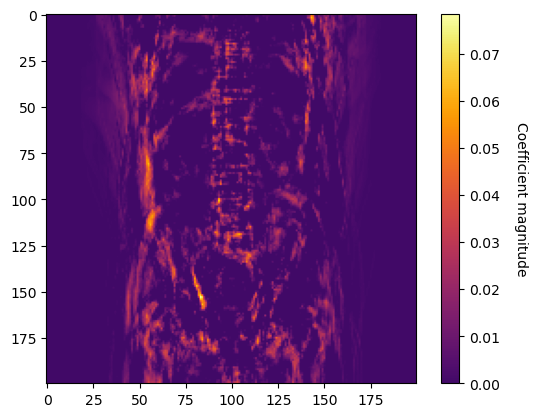

In [14]:
### CLASS 0 IS THE CYST CLIPPPED HERE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('inferno')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster0.coef_[0]
coef_clipped = np.clip(coef, a_min=0, a_max=None)

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef_clipped.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


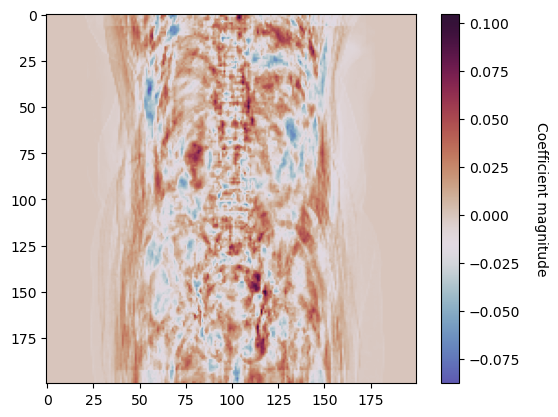

In [15]:
### CLASS 1 IS NORMAL

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('twilight_shifted')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster0.coef_[1]

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


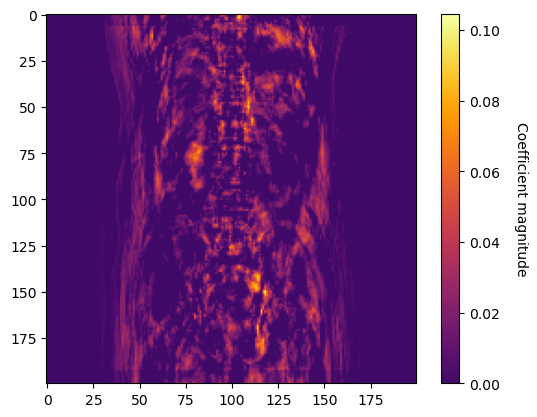

In [16]:
### CLASS 1 IS THE NORMAL CLIPPPED HERE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('inferno')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster0.coef_[1]
coef_clipped = np.clip(coef, a_min=0, a_max=None)

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef_clipped.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


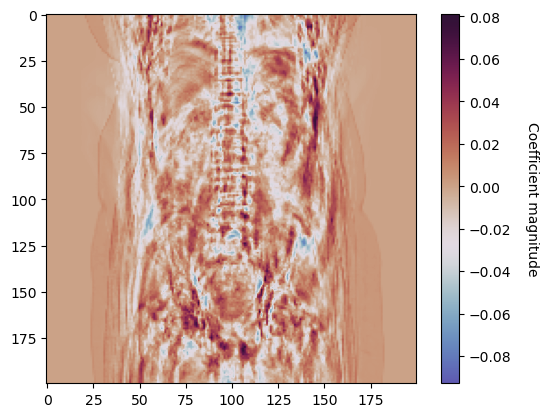

In [17]:
### CLASS 2 IS STONE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('twilight_shifted')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster0.coef_[2]

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


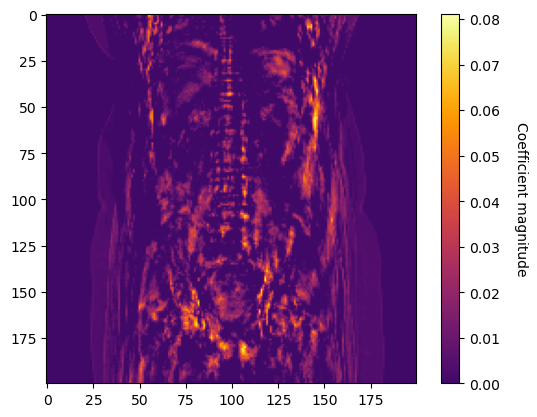

In [18]:
### CLASS 2 IS STONE CLIPPPED HERE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('inferno')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster0.coef_[2]
coef_clipped = np.clip(coef, a_min=0, a_max=None)

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef_clipped.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


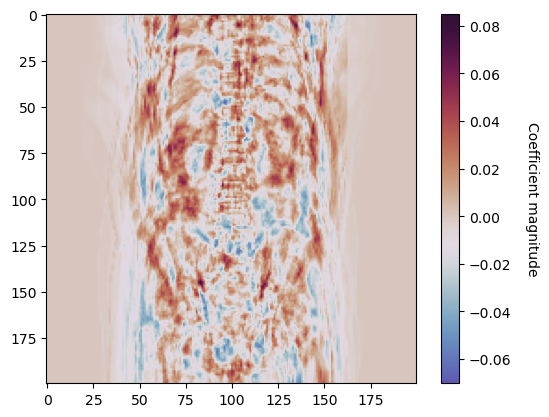

In [19]:
### CLASS 3 IS TUMOUR

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('twilight_shifted')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster0.coef_[3]

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


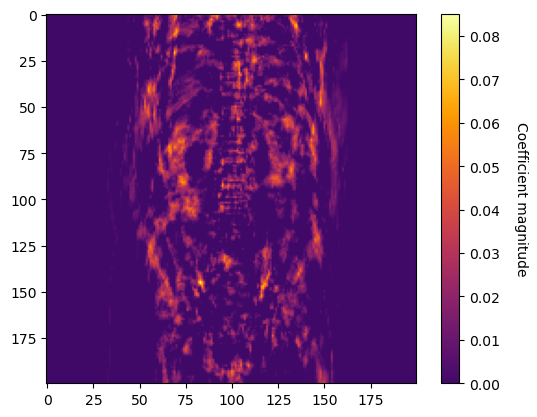

In [20]:
### CLASS 3 IS TUMOUR CLIPPPED HERE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('inferno')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster0.coef_[3]
coef_clipped = np.clip(coef, a_min=0, a_max=None)

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef_clipped.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


**Logistic Regression Cluster 1 Coeff**

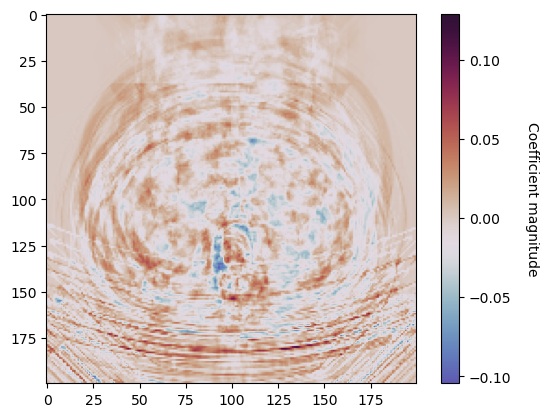

In [21]:
### CLASS 0 IS THE CYST

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('twilight_shifted')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster1.coef_[0]

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


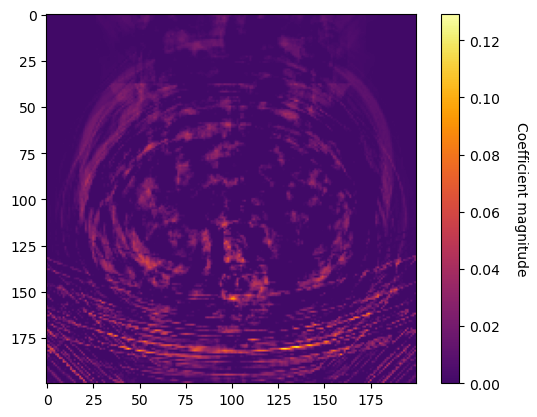

In [22]:
### CLASS 0 IS THE CYST CLIPPPED HERE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('inferno')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster1.coef_[0]
coef_clipped = np.clip(coef, a_min=0, a_max=None)

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef_clipped.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


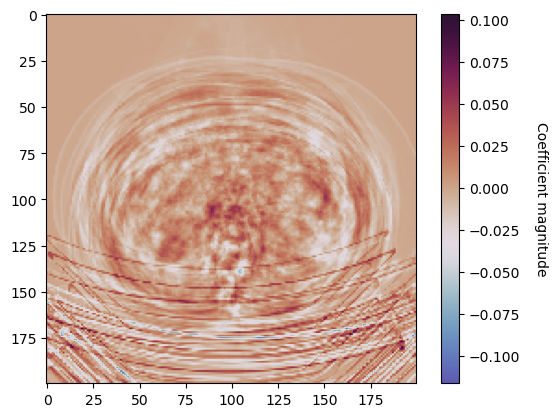

In [23]:
### CLASS 1 IS NORMAL

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('twilight_shifted')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster1.coef_[1]

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


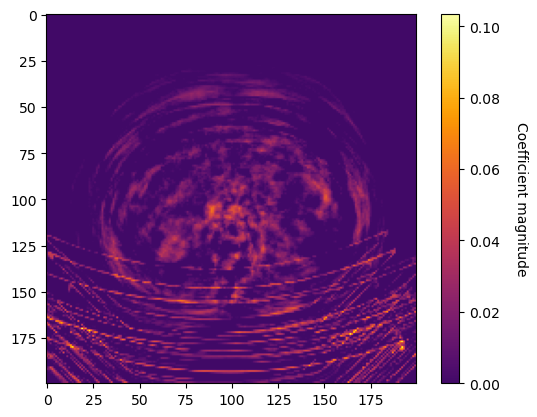

In [24]:
### CLASS 1 IS THE NORMAL CLIPPPED HERE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('inferno')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster1.coef_[1]
coef_clipped = np.clip(coef, a_min=0, a_max=None)

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef_clipped.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


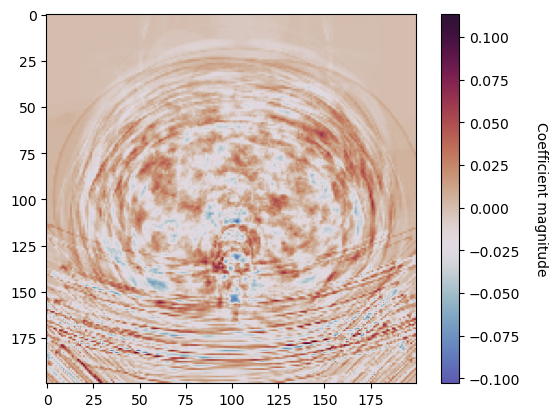

In [25]:
### CLASS 2 IS STONE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('twilight_shifted')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster1.coef_[2]

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


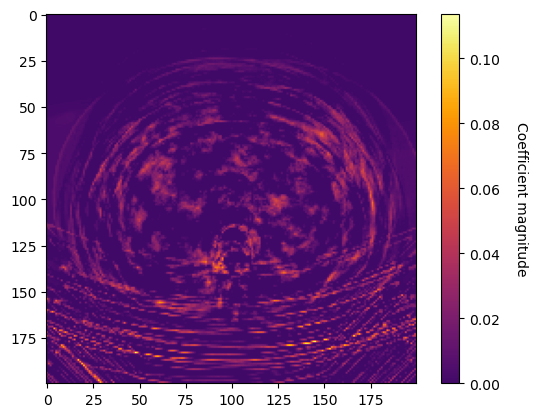

In [26]:
### CLASS 2 IS STONE CLIPPPED HERE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('inferno')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster1.coef_[2]
coef_clipped = np.clip(coef, a_min=0, a_max=None)

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef_clipped.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


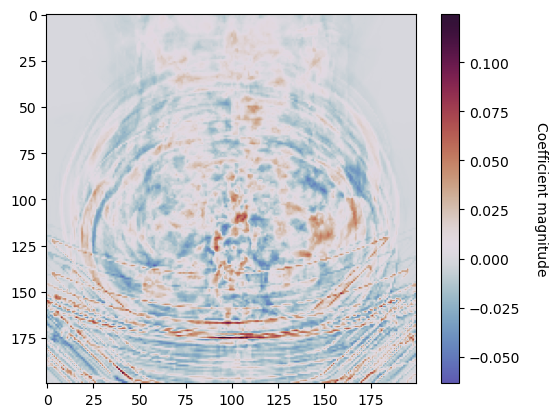

In [27]:
### CLASS 3 IS TUMOUR

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('twilight_shifted')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster1.coef_[3]

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()


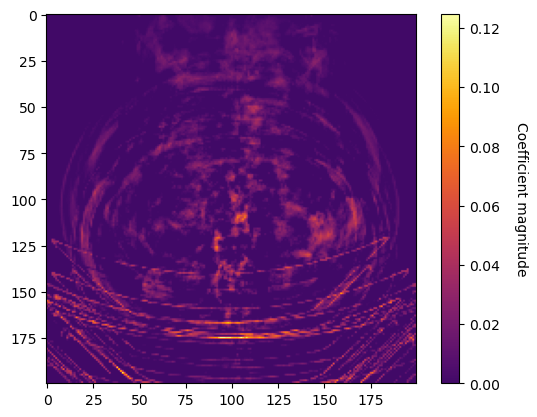

In [28]:
### CLASS 3 IS TUMOUR CLIPPPED HERE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap using the 'viridis' colormap
custom_cmap = ListedColormap(plt.cm.get_cmap('inferno')(np.linspace(0.2, 1, 1024)))

# Get the coefficients of the logistic regression model
coef = lr_cluster1.coef_[3]
coef_clipped = np.clip(coef, a_min=0, a_max=None)

# Average the coefficients across color channels
#coef_avg = np.mean(coef, axis=0)

# Reshape the coefficients to the image shape
coef_img = coef_clipped.reshape(image_size)

# Visualize the feature importance as an image with a custom colorbar
plt.imshow(coef_img, cmap=custom_cmap)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coefficient magnitude', rotation=270, labelpad=20)
plt.show()
